In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn import metrics
import unittest

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Loading Dataset From Google Drive**

In [22]:
df = pd.read_csv("/content/drive/MyDrive/data_banknote_authentication.txt")

### **Unitest To chechk if file was read by Program**

In [29]:
unittest.TestCase.assertTrue(df, 'Data is not read by our Program')

In [4]:
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### **Labeling Columns**

In [5]:
df.columns =['Variance', 'Skewness', 'Kurtosis' ,'Entropy', 'Class']

In [6]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### **Dropping Duplicates**

In [7]:
df = df.drop_duplicates()

In [8]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### **Dropping Null**

In [9]:
df = df.dropna()

In [10]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### **Performing Unit Testing to make sure there are no null values in Dataset**

In [24]:
tst = df.isnull()
print(tst)

      3.6216  8.6661  -2.8073  -0.44699      0
0      False   False    False     False  False
1      False   False    False     False  False
2      False   False    False     False  False
3      False   False    False     False  False
4      False   False    False     False  False
...      ...     ...      ...       ...    ...
1366   False   False    False     False  False
1367   False   False    False     False  False
1368   False   False    False     False  False
1369   False   False    False     False  False
1370   False   False    False     False  False

[1371 rows x 5 columns]


In [25]:
unittest.TestCase.assertTrue(tst, 'Data still contains Null Values')

### **Plotting Dataset**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


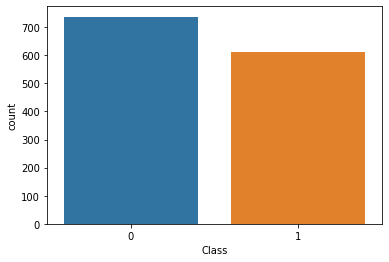

In [11]:
sns.countplot(df["Class"])

### **Data Normalization**

In [12]:
def nrmlzd(dta):
  normalized = (dta - dta.min()) / (dta.max() - dta.min())
  return  normalized
df = nrmlzd(df)

In [13]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,0.835659,0.820982,0.121804,0.644326,0.0
1,0.786629,0.416648,0.310608,0.786951,0.0
2,0.757105,0.871699,0.054921,0.450440,0.0
3,0.531578,0.348662,0.424662,0.687362,0.0
4,0.822859,0.877275,0.057100,0.489711,0.0


### **Heatmap visualization**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

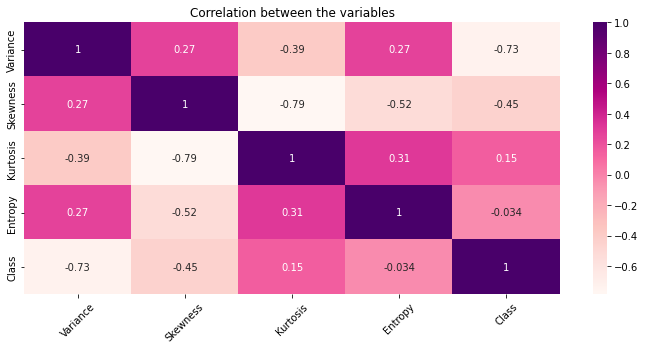

In [14]:
plt.subplots(figsize=(12,5))
gender_correlation=df.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)
plt.savefig('Correlation between the variables.png', dpi=300)
files.download('Correlation between the variables.png')

### **Splitting Dataset**

In [15]:
x_value = df.iloc[:, :-1].values
y_value = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size=.3, random_state=42)

In [16]:
len(x_train)

942

In [17]:
len(y_test)

405

### **Applying Grid Search For Cross Validation**

In [18]:
parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [19]:
model = GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters,cv=10)
model.fit(x_train, y_train)
print(model.best_estimator_)

RandomForestClassifier(max_depth=7, n_estimators=200)


### **Putting best Parameters**

In [26]:
clf  = RandomForestClassifier(max_depth=7, n_estimators=200)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

### **Unit Testing to check if Model is making Prediction**

In [28]:
unittest.TestCase.assertTrue(y_pred, 'The Model is not making any Prediction')

### **Accuracy Score**

In [30]:
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy is: ",acc*100)

Model Accuracy is:  99.75308641975309


### **Confusion Matrix**

In [31]:
cm=confusion_matrix(y_test,y_pred)

Plot Confusion Matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

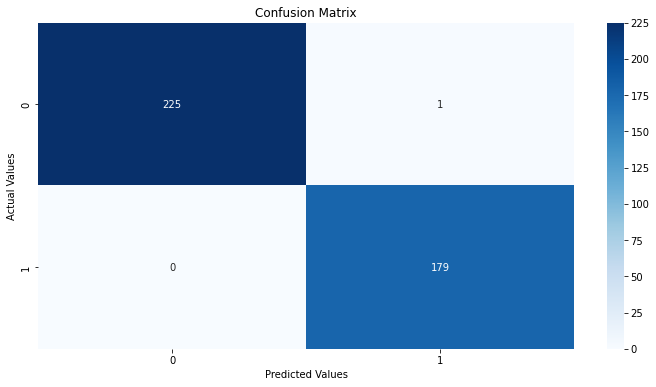

In [32]:
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png', dpi = 300)
files.download('confusion_matrix.png')

### **Classification Report**

In [33]:
hypothesis = ['Actual', 'Trained']
cr = classification_report(y_test, y_pred, target_names= hypothesis)
print(cr)

              precision    recall  f1-score   support

      Actual       1.00      1.00      1.00       226
     Trained       0.99      1.00      1.00       179

    accuracy                           1.00       405
   macro avg       1.00      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405



### **ROC Curve & AUC**

In [34]:
y_pred_proba = clf.predict_proba(x_test)[::,0]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

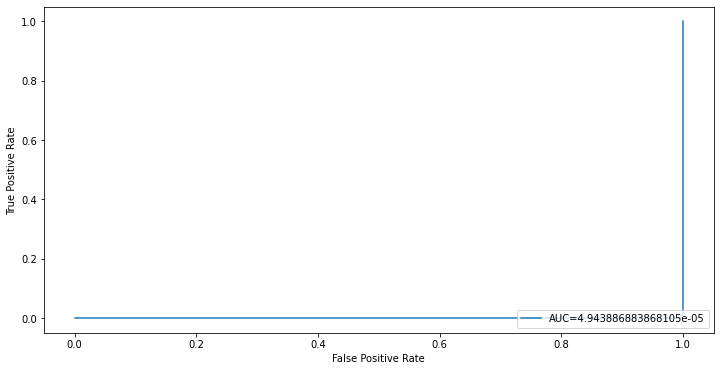

In [35]:
plt.figure(figsize=(12,6))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.savefig('ROC&AUC.png', dpi=300)
files.download('ROC&AUC.png')
